# Exploring Hotels in Gurgaon, India


#### Introduction

The aim of the project is to identify Hotels in Gurgaon, India based on popular places. In this notebook, we will identify various Hotels in Gurgaon city, India, using Foursquare API to help visitors select the restaurants/hotels/bar that suit them the best.

Whenever a user is planning to visit a city they start looking for Hotel during their stay. Here, we'll identify places that are fit for various individuals based on the information collected from the FourSquare APIs, Goibibo API and Data Science. Once we have the plot with the venues, any company can launch an application using the same data and suggest users such information.

#### Data Collection from APIs

To begin with, we will take a look at Gurgaon on the Map using the folium library.

We will also fetch the data from two different APIs.

###### Foursquare API: 
We will use the Foursquare API to fetch venues in Gurgaon starting from the middle upto 10 Kilometers in each direction.
###### Goibibo API: 
Goibibo API provides information about Hotels including the complete address, user ratings etc.

Gurgaon

Gurgaon, officially named Gurugram, is a city located in the northern Indian state of Haryana. It is situated near the Delhi-Haryana border, about 30 kilometres (19 mi) southwest of the national capital New Delhi, 153 km (95 mi) south of Karnal and 268 km (167 mi) south of Chandigarh, the state capital.It is one of the major satellite cities of Delhi and is part of the National Capital Region of India

We can use the geopy library to extract the latitude and longitude values of Gurgaon.

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library

In [2]:
address = 'Gurgaon'

geolocator = Nominatim(user_agent="Gurgaon_explorer")
location = geolocator.geocode(address,timeout=10)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Gurgaon are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Gurgaon are 28.4646148, 77.0299194.


Let's use the folium library to create a complete map zoomed on Gurgaon. We'll also plot a marker on the coordinates we just identified above. This would give us a relatively good look at the center point we will be considering.

In [3]:
import folium

Gurgaon_map = folium.Map(location = [latitude, longitude], zoom_start = 13)
folium.Marker([latitude, longitude]).add_to(Gurgaon_map)
Gurgaon_map

### Foursquare API

We begin by fetching a total of all venues in Gurgaon upto a range of 5 Kilometers using the Foursquare API. The Foursquare API has the explore API which allows us to find venue recommendations within a given radius from the given coordinates. We will use this API to find all the venues we need.

Foursquare API requires client_id, and client_secret to function which can be accessed after creating a developer account. The version is a required parameter which defines the date on which we are browsing so that it retrieves the latest data.

In [4]:
CLIENT_ID = 'ODGUI0DV1B2M0TH5TSESN4VEIDKOMKQCBMRXVSWOVSWSHQXM' # your Foursquare ID
CLIENT_SECRET = 'EHNXTE1GTLRUGTAVLNA2ZUUC4NEUN4XAC5S4TR0AJQPYVTGA' # your Foursquare Secret
VERSION = '20190625' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ODGUI0DV1B2M0TH5TSESN4VEIDKOMKQCBMRXVSWOVSWSHQXM
CLIENT_SECRET:EHNXTE1GTLRUGTAVLNA2ZUUC4NEUN4XAC5S4TR0AJQPYVTGA


In [5]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 10000 # define radius - 10 KM

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=ODGUI0DV1B2M0TH5TSESN4VEIDKOMKQCBMRXVSWOVSWSHQXM&client_secret=EHNXTE1GTLRUGTAVLNA2ZUUC4NEUN4XAC5S4TR0AJQPYVTGA&v=20190625&ll=28.4646148,77.0299194&radius=10000&limit=100'

In [6]:
results = requests.get(url).json()
#results

We define the get_category_type method to get the correct category for each venue.

In [7]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Convert json to Pandas dataframe

In [8]:
#Clean the json and structure it into Pandas dataframe
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.address', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,address,lat,lng
0,Cocktails and Dreams Speakeasy,Bar,"Sector 15, Part 2",28.457921,77.044597
1,Leisure Valley,Park,"Leisure Valley Rd, Sector 29",28.469142,77.064690
2,Vivanta by Taj,Hotel,"Vivanta by Taj - Gurgaon, NCR",28.455952,77.070524
3,Kingdom Of Dreams,General Entertainment,Sector 29,28.468011,77.068125
4,Downtown,Brewery,Sector 29,28.468474,77.062988
5,Roots - Cafe in the Park,Café,"Rajiv Gandhi Renewable Energy Park, Leisure Va...",28.469500,77.068264
6,Prankster,Nightclub,Sector 29 market,28.469300,77.063476
7,Crowne Plaza,Hotel,"Site No.2 Sector 29, Opposite Signature Tower",28.468254,77.059928
8,Cafe Di Ghent,Café,"208, Level 2, Cross Point Mall",28.468248,77.082918
9,Galleria Market,Market,"DLF City, Phase IV",28.467333,77.081923


We'll first plot the data points on the map. We'll then try to combine data points that have their latitude and longitude values very close to one another. From the remaining selected venues, we will inspect the venues to ensure that any remaining mismatched venues are also removed from the final dataset of venues before we begin any analysis.

We will first plot the Foursquare data on the map.

In [9]:
Gurgaon_map = folium.Map(location = [latitude, longitude], zoom_start = 13)

for name, latitude, longitude in zip(nearby_venues['name'], nearby_venues['lat'], nearby_venues['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(Gurgaon_map)  

Gurgaon_map

In [10]:
#Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(nearby_venues['categories'].unique())))

There are 42 uniques categories.


From the map, we can infer that there are clusters of venues around Sector 29, Sector 27, Sector 15 and Golf Course Road. We can also plot the category count and see the major type of venues that exist.

<BarContainer object of 42 artists>

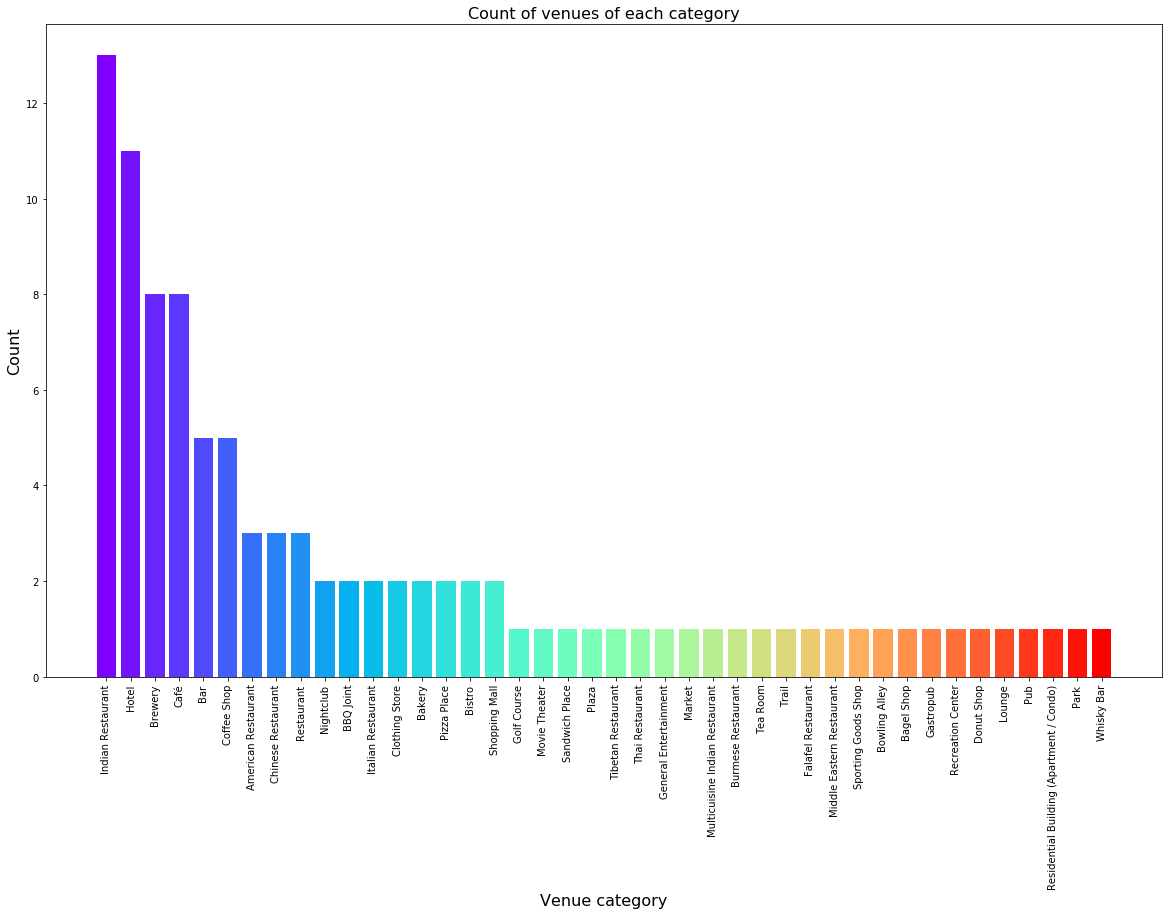

In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

venue_distribution = nearby_venues['categories'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

As we can see the majority venues are Hotel, Indian Restaurant, Brewery and Cafe. So, as a tourist, you have got your places.

Let's explore nearby Hotel.

In [13]:
nearby_hotel = nearby_venues.loc[nearby_venues['categories'] == 'Hotel']
nearby_hotel.index = range(len(nearby_hotel))
nearby_hotel

,name,categories,address,lat,lng
0,Vivanta by Taj,Hotel,"Vivanta by Taj - Gurgaon, NCR",28.455952,77.070524
1,Crowne Plaza,Hotel,"Site No.2 Sector 29, Opposite Signature Tower",28.468254,77.059928
2,The Westin,Hotel,"Number 1, Mg Road, Sector 29, New Delhi Ncr",28.476890,77.070552
3,DIA Park Premier,Hotel,"53-357, Sector 29, City Centre",28.462411,77.068125
4,Trident,Hotel,Udyog vihar,28.501032,77.089236
5,The Oberoi,Hotel,443,28.501941,77.088162
6,The Leela Ambience,Hotel,Ambience Island,28.505570,77.096530
7,"Le Méridien, Gurgaon",Hotel,"M.G. Road, Sector -26, Delhi-Gurgaon Border",28.480312,77.107771
8,DoubleTree by Hilton Hotel,Hotel,"Sector -56, Golf Course Road",28.422142,77.104506
9,The Umrao,Hotel,Delhi Gurgaon Highway,28.525524,77.098394


### Goibibo API

Goibibo API allows using its search API to search for any given Hotel based on certain search filters such as query, latitude, longitude and Hotel_Id etc. It also requires a app id and app key which can be accessed with a developer account.

We'll use the city id for Gurgaon and fetch the rating for hotels. We will pass app id, app key and city id in URL.

In [14]:
app_id = '8e05dad5'
app_key = 'e1364305bb41eb7cc617fbc8ac7d6d7e'
city_id = '1466927038870613796'

url = "http://developer.goibibo.com/api/voyager/get_hotels_by_cityid/?app_id={}&app_key={}&city_id={}".format(
    app_id,
    app_key,
    city_id)
    
resp = requests.get(url)
#print(resp)
resp_data = resp.json().get('data')
hotels = []
if resp_data:
    for key in resp_data:
        hotel = {}
        hotel_geo_node = resp_data[key]['hotel_geo_node']
        hotel_data_node = resp_data[key]['hotel_data_node']

        hotel['name'] = hotel_data_node['name']
        hotel['lat'] = hotel_geo_node['location']['lat']
        hotel['long'] = hotel_geo_node['location']['long']

        if('gir_data' in hotel_data_node['extra'] and  'hotel_rating' in hotel_data_node['extra']['gir_data']):
            hotel['rating'] = hotel_data_node['extra']['gir_data']['hotel_rating']
            
        if('pin' in hotel_data_node['loc']):
            hotel['pincode'] = hotel_data_node['loc']['pin']

        hotels.append(hotel)

Goibibo_Hotel = pd.DataFrame(hotels)
Goibibo_Hotel

,lat,long,name,pincode,rating
0,28.435265,77.046921,OYO 30704 Divine Residency,122001,3.2
1,28.492874,77.095642,"OYO Home 39565 Decent Studio Cyber Hub,Dlf Cyb...",122022,NaN
2,28.470644,77.097832,Service One Guesthouse (Suite Room),122021,1.0
3,28.445290,77.065079,When In Gurgaon - Service Apartments,122001,4.2
4,28.498867,77.061874,Sheetal Hotel and Restaurant,122001,3.0
5,28.439911,77.040794,Collection O Medanta,122001,4.3
6,28.500105,77.098099,OYO 6969 Port Residency,122001,3.2
7,28.387238,77.019005,Apartment Room,122001,NaN
8,28.415300,77.049370,Cinnamon Home Stays South City,122018,4.4
9,28.462242,77.077835,OYO 15526 Lime Wood Stay,122003,4.3


Now we will select Hotel details which are common in both API dataframe.

In [15]:
hotel_name = ["Le Meridien","Vivanta","Crowne Plaza","DIA Park","The Westin Gurgaon","Trident","Oberoi","Leela","DoubleTree by Hilton","Umrao","Hyatt Regency"]

Goibibo = Goibibo_Hotel[Goibibo_Hotel['name'].str.contains(r'\b(?:{})\b'.format('|'.join(hotel_name)))]
Goibibo.index = range(len(Goibibo))
Goibibo

,lat,long,name,pincode,rating
0,28.505222,77.097107,The Leela Ambience Gurgaon Hotel and Residences,122002,4.3
1,28.480312,77.107773,"Le Meridien Gurgaon, Delhi NCR",122002,4.3
2,28.501072,77.088860,Trident Gurgaon,122016,4.6
3,28.502417,77.088501,The Oberoi Gurgaon,122016,4.6
4,28.422270,77.104080,DoubleTree by Hilton Gurgaon,122011,4.5
5,28.468027,77.059708,Crowne Plaza GURGAON,122001,4.5
6,28.477196,77.070427,"The Westin Gurgaon,New Delhi",122002,5.0
7,28.392250,76.976212,Hyatt Regency Gurgaon,122004,4.5


As we can see, we only got 8 hotels with Rating from Goibibo, also ratings are above 4 which doesn't make good case for further analysis.

Let's get some more data from Goibibo with same pincode area which is not part of FourSquare API but this will make good case for analysis

In [16]:
# Get the Hotel for specific Pin Code Area
Pin_Code = ["122001","122002","122016","122011"]
Pin_Hotel = Goibibo_Hotel[Goibibo_Hotel['pincode'].str.contains(r'\b(?:{})\b'.format('|'.join(Pin_Code)))]
Pin_Hotel.index = range(len(Pin_Hotel))

# Drop the Hotel where we do not have rating
Pin_Hotel = Pin_Hotel.dropna(axis=0, subset=['rating'])

# Drop the OYO Hotel
Drop_List = ["OYO","Apartment","Apartments","Guest","Residence","Residency","House","RESIDENCY","Regency","Hospitality","Stays"] 
New_Hotel = Pin_Hotel[~Pin_Hotel["name"].str.contains(r'\b(?:{})\b'.format('|'.join(Drop_List)))]

#Select the Hotel where Rating is greater than 2. We don't want to include poor Hotel in our analysis
Popular_hotel = New_Hotel.loc[New_Hotel['rating'] > '2.0']
Popular_hotel.index = range(len(Popular_hotel))
Popular_hotel

,lat,long,name,pincode,rating
0,28.498867,77.061874,Sheetal Hotel and Restaurant,122001,3.0
1,28.439911,77.040794,Collection O Medanta,122001,4.3
2,28.480816,77.093315,The Bristol Hotel,122002,3.8
3,28.466511,77.041534,Hotel Dove's Inn,122001,3.7
4,28.477133,77.099426,LE REGENT,122002,3.5
5,28.466208,77.100098,Green Earth,122001,4.0
6,28.458038,77.034386,Clarks Inn Gurugram,122001,3.8
7,28.433001,77.074997,Grand Oyster Homestay,122001,4.0
8,28.473591,77.091026,SilverKey Executive stays 20024 Golf Course Road,122002,3.9
9,28.469240,77.074059,Hotel Exotica,122001,4.5


Drop the rows where we do not have Hotel rating.

Now we will concatenate both datasets.

In [18]:
Final_Hotel = pd.concat([Goibibo, Popular_hotel], axis = 0)
Final_Hotel = Final_Hotel.drop_duplicates()

### Analysis

The complete dataset is now in its final form.

We will inspect these Hotels based on their rating. The rating of a venue are based on user reviews.

#### Rating

Rating of a venue is an important factor on which a visitor decides whether it is worth it to stay in this hotel. To cater to this, we will first see what is the average rating for all the hotels in the city. Next, we will plot the venues on the map and color code them.

We'll first identify the various rating values and plot them as a bar plot with their counts to see the most common rating.


Text(0.5, 1.0, 'Count of Hotels with given rating')

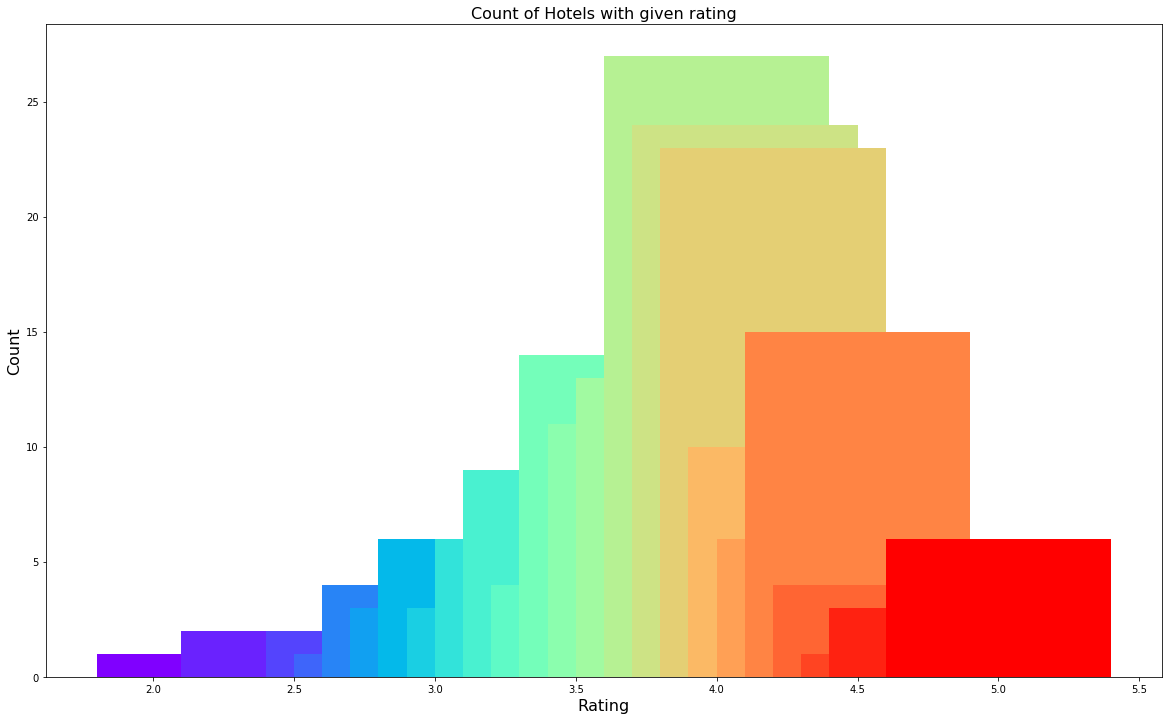

In [19]:
Final_Hotel['rating'] = Final_Hotel['rating'].astype(float)
rating = Final_Hotel['rating'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.bar(rating.index, rating.values, color = cm.rainbow(np.linspace(0, 1, len(rating.index))))
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of Hotels with given rating", fontsize = 16)

Let's create bins for various ratings and plot them in different colors on the map. The ratings will be divided between 4 bins:

    1 to 2
    2 to 3
    3 to 4
    4 to 5

In [20]:
bins = [1.0, 2.0, 3.0, 4.0, 5.0]
labels = ['Low', 'Okay', 'Good', 'Very good']
Final_Hotel['rating_bin'] = pd.cut(Final_Hotel['rating'].astype(float), bins = bins, labels = labels, include_lowest = True)
Final_Hotel.head(5)

,lat,long,name,pincode,rating,rating_bin
0,28.505222,77.097107,The Leela Ambience Gurgaon Hotel and Residences,122002,4.3,Very good
1,28.480312,77.107773,"Le Meridien Gurgaon, Delhi NCR",122002,4.3,Very good
2,28.501072,77.088860,Trident Gurgaon,122016,4.6,Very good
3,28.502417,77.088501,The Oberoi Gurgaon,122016,4.6,Very good
4,28.422270,77.104080,DoubleTree by Hilton Gurgaon,122011,4.5,Very good


Let's plot the Hotels on the Map.

In [25]:
color_map = {'Low': 'red', 'Okay': 'orange', 'Good': 'green', 'Very good': 'blue'}

Gurgaon_map = folium.Map(location = [latitude, longitude], zoom_start = 13)

for name, pincode, latitude, longitude, rating_bin in zip(Final_Hotel['name'], 
                                                 Final_Hotel['pincode'],
                                                 Final_Hotel['lat'], 
                                                 Final_Hotel['long'],
                                                 Final_Hotel['rating_bin']):
    label = '{}','{}'.format(name, pincode)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[rating_bin]),
        popup = label).add_to(Gurgaon_map)  

Gurgaon_map

The map has the location of all the Hotels. It appears that many Hotels are located near about Sector 29 and Golf Course Road with Good Rating. If a tourist is looking for nice stay in Gurgaon, he/she should check in Sector 29

In [29]:
Final_Hotel

,cluster_labels,lat,long,name,pincode,rating,rating_bin
0,0,28.505222,77.097107,The Leela Ambience Gurgaon Hotel and Residences,122002,4.3,Very good
1,0,28.480312,77.107773,"Le Meridien Gurgaon, Delhi NCR",122002,4.3,Very good
2,0,28.501072,77.088860,Trident Gurgaon,122016,4.6,Very good
3,0,28.502417,77.088501,The Oberoi Gurgaon,122016,4.6,Very good
4,0,28.422270,77.104080,DoubleTree by Hilton Gurgaon,122011,4.5,Very good
5,0,28.468027,77.059708,Crowne Plaza GURGAON,122001,4.5,Very good
6,0,28.477196,77.070427,"The Westin Gurgaon,New Delhi",122002,5.0,Very good
7,0,28.392250,76.976212,Hyatt Regency Gurgaon,122004,4.5,Very good
0,1,28.498867,77.061874,Sheetal Hotel and Restaurant,122001,3.0,Okay
1,0,28.439911,77.040794,Collection O Medanta,122001,4.3,Very good
